# Data Analysis with Python
---
### Table of contents
[Chapter 1: Importing Data Sets](#chapter-1-importing-data-sets)    
[Chapter 2: Data Wrangling](#chapter-2-data-wrangling)  
[Chapter 3: Exploratoty Data Analysis](#chapter-3-exploratory-data-analysis)    
[Chapter 4: Model Development](#chapter-4-model-development)    
[Chapter 5: Model Evaluation and Refinement](#chapter-5-model-evaluation-and-refinement)    
[Final Assignment](#final-assignment)   

## Chapter 1: Importing Data Sets
### Python Packages for Data Science
1. **Scientifics Computing** Libraries
- **Pandas** (Data Structures & Tools)
- **NumPy** (Arrays & Matrices)
- **SciPy** (Integrals, solving differential equations, optimisations)
2. **Visualisation** Libraries
- **Matplotlib** (plots & graphs, most popular)
- **Seaborn** (plots: heat maps, time series, violin plots)
3. **Algorithmic** Libraries
- **Scikit-learn** (Machine Learning: Regression, classification, and so on)
- **Statsmodels** (Explore data, estimate statistical models, and perform statistical tests)

### Importing Data
- Process of loading and reading data into Python from various resources
- Two important properties:
    - Format: .csv, .json, .xlsx, .hdf,...
    - File Path of dataset:
        - Computer: */Desktop/mydata.csv*
        - Internet: *https://archive.ics.uci.edu/autos/imports-85.data*
#### Importing and Exporting a CSV in Python
```py
import pandas as pd
url = 'https://archive.ics.uci.edu/autos/imports-85.data'
# Import
df = pd.read_csv(url, header = None) # Dataset without the header
# Printing the DataFrame in Python
df # print the entire DataFram
df.head(n) # Show the first "n" rows of DataFrame
df.tail(n) # Show the bottom "n" rows of DataFrame
# Adding headers
## Replace default header (by df.columns = headers)
headers = ["symboling", "normalised-losses", "make",...]
df.columns = headers
# Export
path = "C:\Windows\...\ automobile.csv"
df.to_csv(path)
```
|Data Format|Read|Save|
|-----------|----|----|
|csv|pd.read_csv()|df.to_csv()|
|json|pd.rea_json()|df.to_json()|
|Excel|pd.read_excel()|df.to_excel()|
|sql|pd.read_sql()|df.to_sql()|

### Getting Started Analysing Data in Python
- Basic insights from the data
    1. Understand your data before you begin any analysis
    2. Should check:
        - Data Typqes
        - Data Distributions
    3. Locate potential issues with the data
#### Data Types
|Pandas Type|Native Python Type|Description|
|-|-|-|
|object|string|numbers and strings|
|int64|int|numeric characters|
|float64|float|numeric characters with decimals|
|datatime64, timedelta[ns]| N/A (but see the *datatime* module in Python's standard library)|time data|
Why check data types?
- potential infor and type mismatch
- compatibility with Python methods
We use `dataframe.dtypes` to check data types
```py
df.dtypes
# Check a statistical summary
df.describe()
# Check full summary statistics (including object type attributes)
df.describe(include = 'all')
# Check a concise summary of DataFrame
df.info()
```

### Accessing Databases with Python
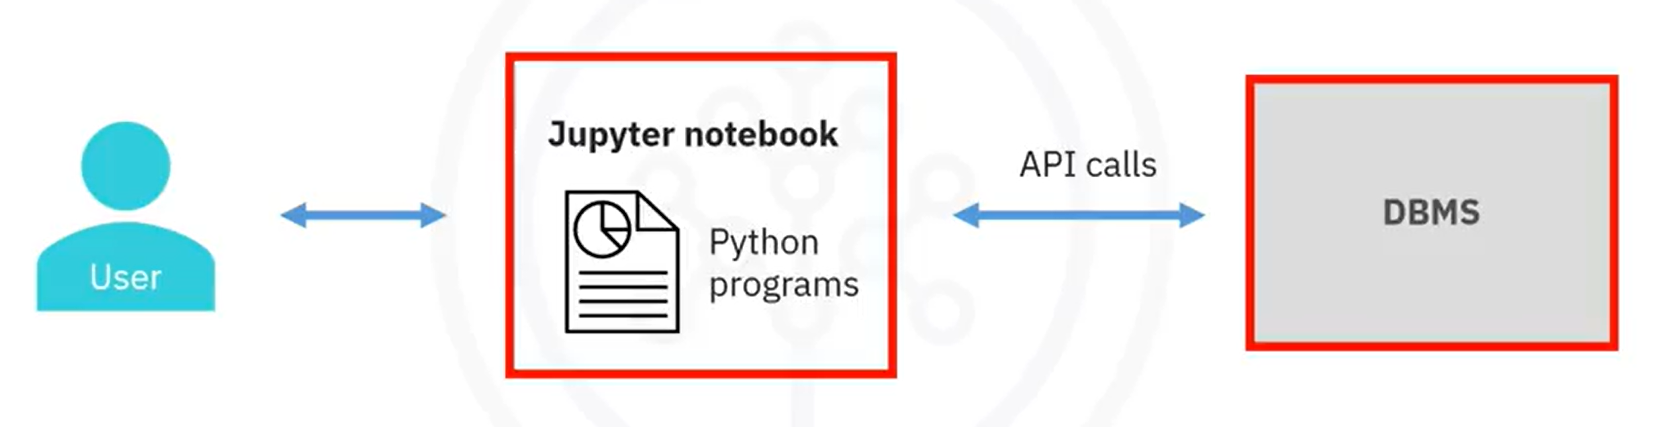
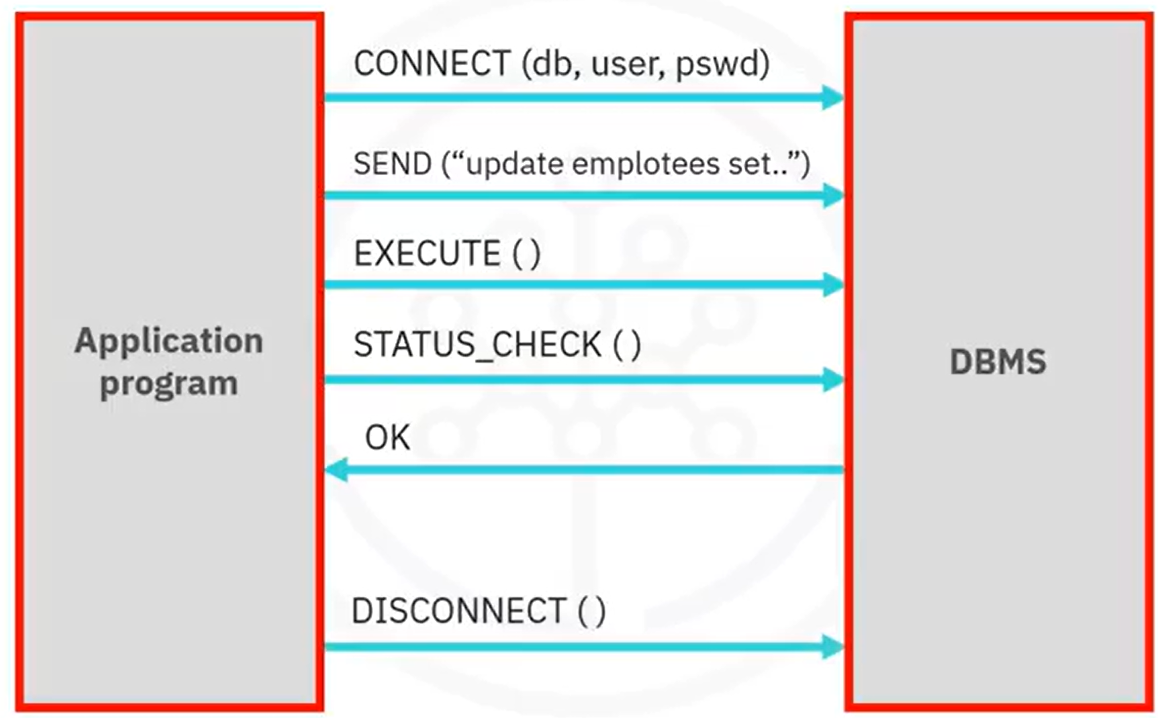
Concepts of the Python DB API
1. Connection Objects
    - Database connections
    - Manage transactions
2. Cursor Objects
    - Database Queries
What are Connection methods?
- cursor()
- commit()
- rollback()
- close()

Writing code using DB-API
```py
from dmodule import connect

# Create connection object
connection = connect('databasename', 'username', 'pswd')
# Create a cursor object to run queries and fetch results
cursor = connection.cursor()

# Run queries
cursor.execute('select * from mytable')
results = cursor.fetchall()

# Free resources to avoid usued connections
cursor.close()
connection.close()
```
### Lab: Importing Data Sets - Used Cars Pricing
[🔗 Open Lab: Importing Data Sets - Used Cars Pricing](lab_import_datasets_used_cars_pricing.ipynb)

### Overview: Laptop Pricing Data Set
[🔗 Open Overview: Laptop Pricing Data Set](overview_laptop_pricing_data_sets.pdf)

### Lab: Importing Data Sets - Laptop Pricing
[🔗 Open Lab: Importing Data Sets - Laptop Pricing](lab_importing_dataset_laptop_pricing.ipynb)

### Module 1 Cheat Sheet: Importing Data Sets
[🔗 Open Module 1 Cheat Sheet: Importing Data Sets](module1_cheatsheet.pdf)

## Chapter 2: Data Wrangling
### Pre-processing Data in Python
**Also know as:** Data Cleaning, Data Wrangling
- Accessing columns: `df[symboling']`, `df['body-style']
- Add value to each column: `df['symboling']=df['symboling']+1`

### Dealing with missing values in Python
- Missing values occur when no data calue is stored for a variable (feature) in a an observation.
- Could be represented as "?", "N/A", 0 or just a blank cell.

#### How to deal with missing value
1. **Check with the data collection source**
2. **Drop the missing values**
    - drop the variable
    - drop the data entry
3. **Replace the missing value**
    - replace it with an average (if similar datapoints)
    - replace it by frequency
    - replace it based on other functions
4. **Leave it as missing data**

#### How to drop misisng values in Python
Use `dataframe.dropna()` (axis=0 drops the entire row; axis=1 drops the entire column)

Example: 
```py
df.dropna(subset=['price'], axis=0, inplace=True)
df = df.dropna(subset=['price'], axis=0) # equivalent code
```

#### How to replace missing values in Python
Use `dataframe.replace(missing_value, new_value)`

Example: replace by the mean value
```py
mean = df['normalised-losses'].mean()
df['normalised-losses'].replace(np.nan, mean)
```

### Data Formatting
- Data is usually collected from different places and stored in different formats
- Bringing data into a common standard of expression allows users to make meaningful comparison

|Non-formatted|Formatted|
|-|-|
|- confusing <br> - hard to aggregate <br> - hard to compare| - more clear <br> - easy to aggregate <br> - easy to compare|

Example:
|City|City|
|-|-|
|N.Y.|New York|
|Ny|New York|
|NY|New York|
|New York|New York|

#### Applying calculations to an entire columns
Covert 'mpg' to 'L/100km' in Car dataset
|city-mpg|city-L/100km|
|-|-|
|21|11.2|
|21|11.2|
|19|12.4|
|...|...|
```py
df['city-mpg']= 235/df['city-mpg']

df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)
```
#### Incorrect data types
Sometimes the wrong data types is assigned to a feature
```py
df['price'].tail(5)
```
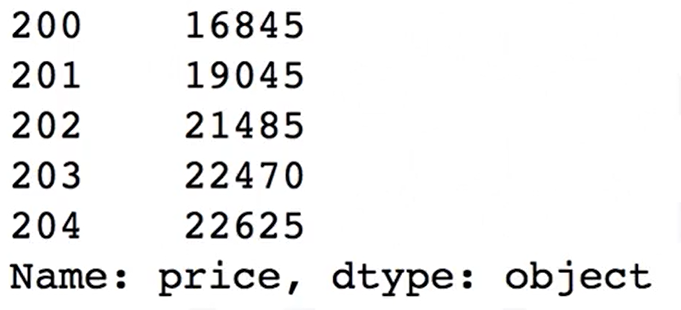


#### Correcting data types
- To *identify* data types: Use `dataframe.dtypes()` to identify data type
- To *convert* data types: Use `dataframe.astype()` to convert data type

Example: Convert data type to integer in column 'price'
```py
df['price']=df['price'].astype('int')
```

### Data Normalisation
- Uniform the features values with different range
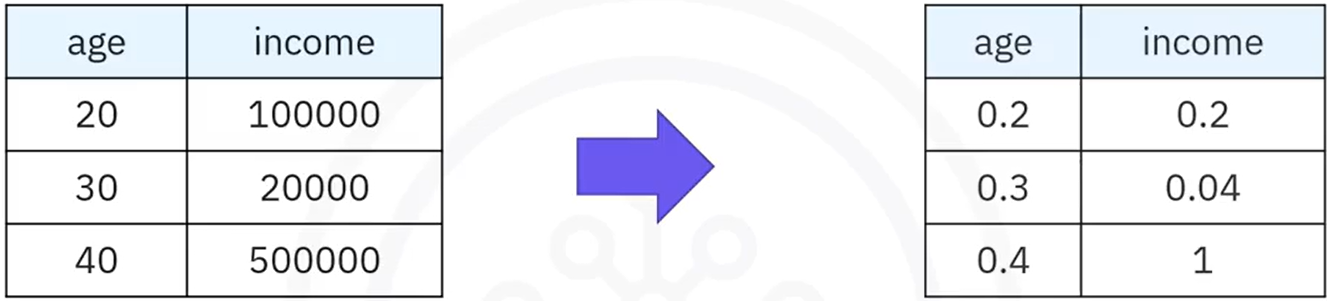

|Not-normalised|Normalised|
|-|-|
|- 'age' and 'income' are in different range. <br> - hard to compare <br> - 'income' will be influence the result more| - similar value range <br> - similar intrinsic influence on analytical model|

#### Methods of normalising data
Several approaches for normalisation:

1. **Simple Feature scaling**: makes new values range between 0 and 1.
$$x_{new} = \frac{x_{old}}{x_{max}}$$
2. **Min-Max**: results new values range between 0 and 1.
$$x_{new}= \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$$
3. **Z-score** (or **Standard score**): results values hover around 0 and typically range between -3  and +3, but can be higher or lower.
$$x_{new}= \frac{x_{old} - \mu}{\sigma}$$

##### Simple Featuqres Scaling in Python
With Pandas:
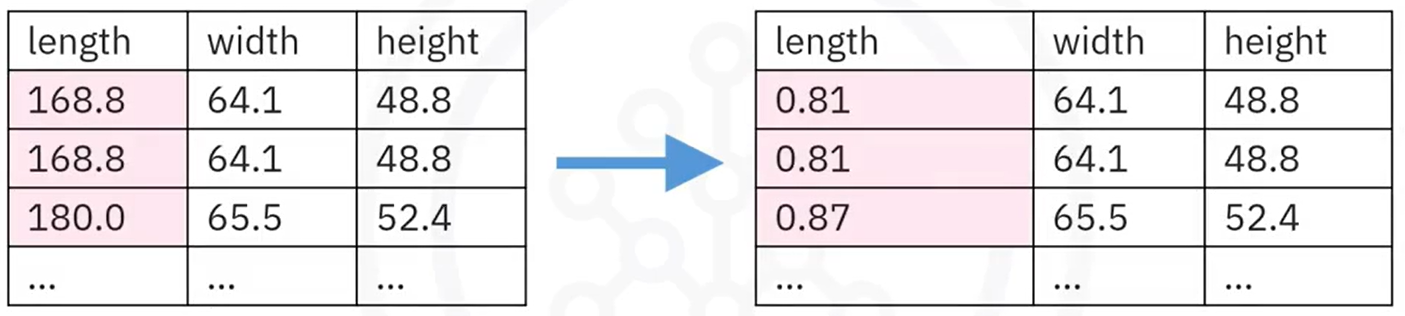

```py
df['length'] =(df['length'] - df['length'].min())/(df['length'].max() - df['length'].min())
```

##### Z-score
With Pandas:
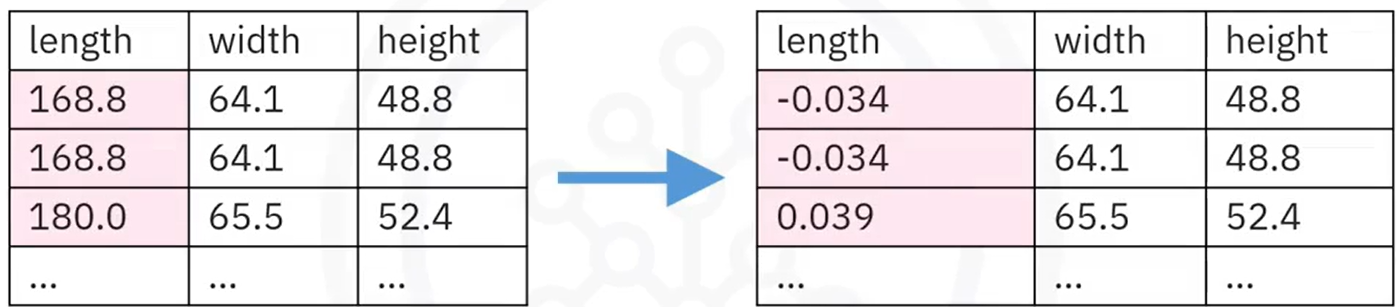

```py
df['length'] = (df['length'] - df['length'].mean())/df['length'].std()
```

### Binning
- **Binning**: Grouping of values into "bins"
- Convert numeric into categorical variables
- Group a set of numerical values into a set of "bins"
- "price" is an feature range from 5,000 to 45,500
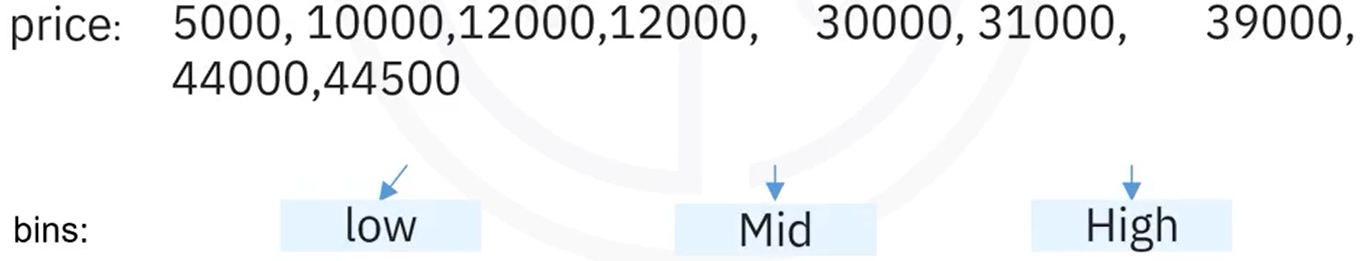
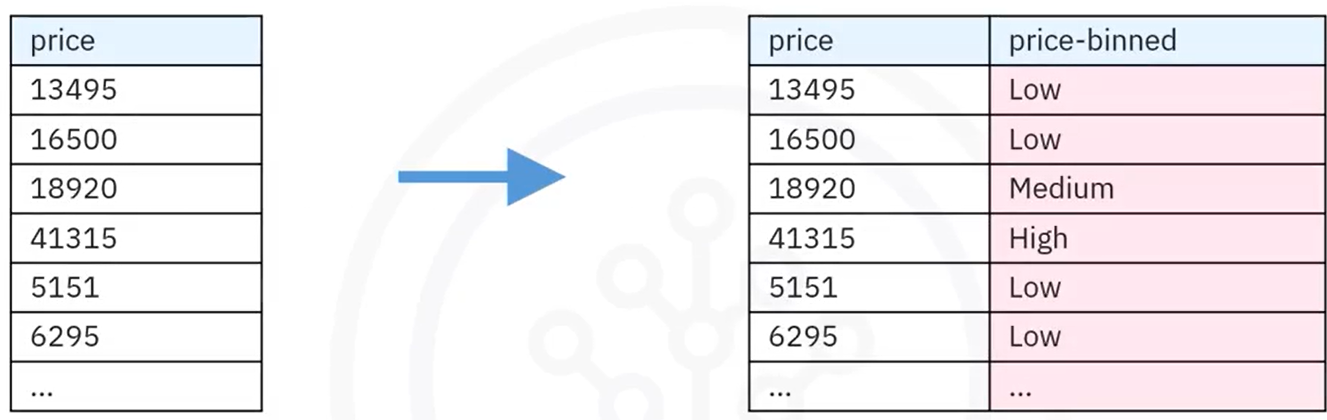

```py
bins = np.linspace(min(df['price']), max(df['price']), 4) 
# We need 3 bins, but we needs 4 numbers as devider
group_names = ['Low', 'Medium', 'High']
# We create a list group underscore names that contains the different bin names
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)
```
#### Visualising binned data
- Histograms
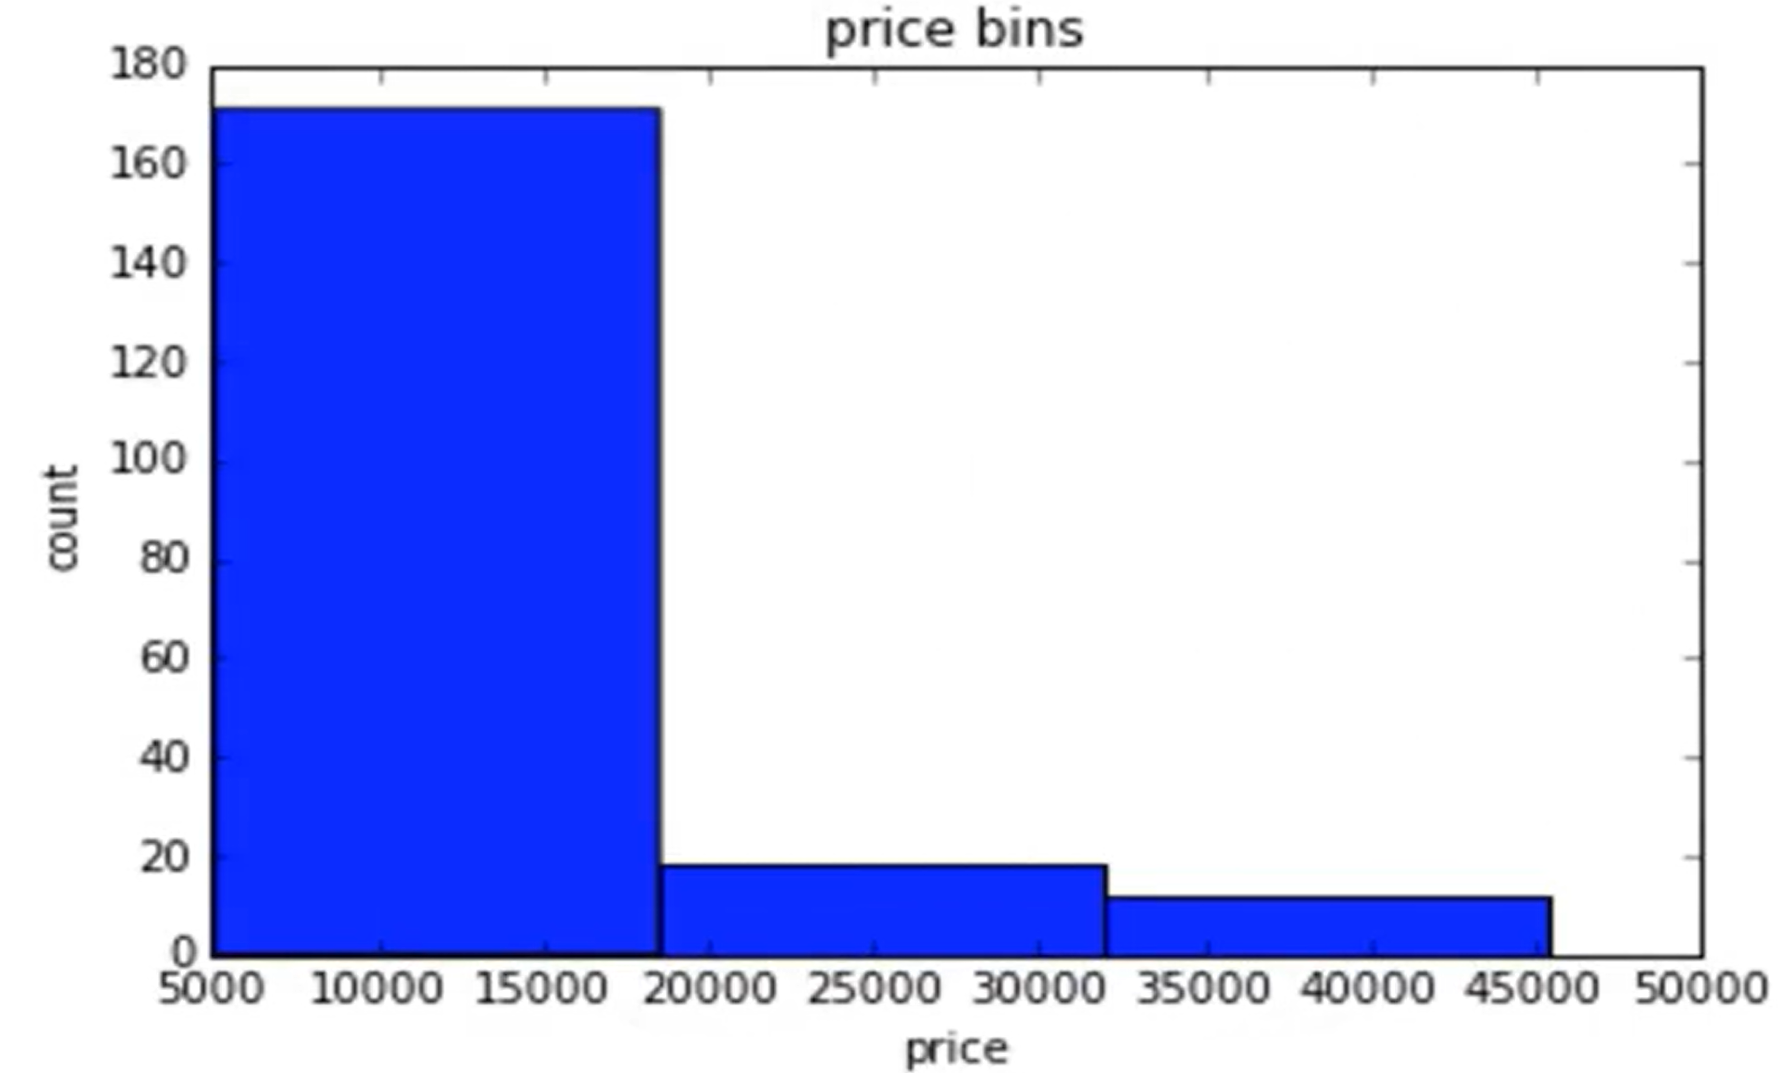

### Turning Categorical Variables into Quantitative Variables in Python
#### Categorical variables
Problem:
Most statistical models cannot take in the object/strings as input
Solution:
- Add dummy variables for each unique category
- Assign 0 or 1 in each category
#### Dummy variables in Python pandas
- Use pandas.get_dummies() method.
- Convert categorical variables to dummy variables (0 or 1)
```py
pd.get_dummies(df['fuel'])
```

### Lab: Data Wrangling - Used Cars Pricing
[🔗 Open Lab: Data Wrangling - Used Cars Pricing](lab_data_wrangling_used_cars_pricing.ipynb)

### Lab: Data Wrangling - Laptop Pricing
[🔗 Open Lab: Data Wrangling - Laptop Pricing](lab_data_wrangling_laptop_pricing.ipynb)

### Module 2 Cheat Sheet: Data Wrangling
[🔗 Open Module 2 Cheat Sheet: Data Wrangling](module2_cheatsheet.pdf)

## Chapter 3 Exploratory Data Analysis
### Exploratory Data Analysis
- Preliminary step in data analysis to:
    - Summarise main characteristics of the data
    - Gain better understanding of the data set
    - Uncover relationships between variables
    - Extract important variables
- Question:
`What are the characteristics which have the most impact on the car price?`

### Descriptive Statistics
- Explore data before building complicated models
- Calculate descriptive statistics for your data
- Describe basic features of data
- Giving short summaries about the sample and measure of the data
- Summarise statistics using pandas **describe()** method
```py
df.describe()
```
- Summarise the categorical data is by using the **value_counts()** method
```py
drive_wheels_counts = df['drive-wheels'].value_counts()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
```
- Summarise numeric data by using the **Box Plots**
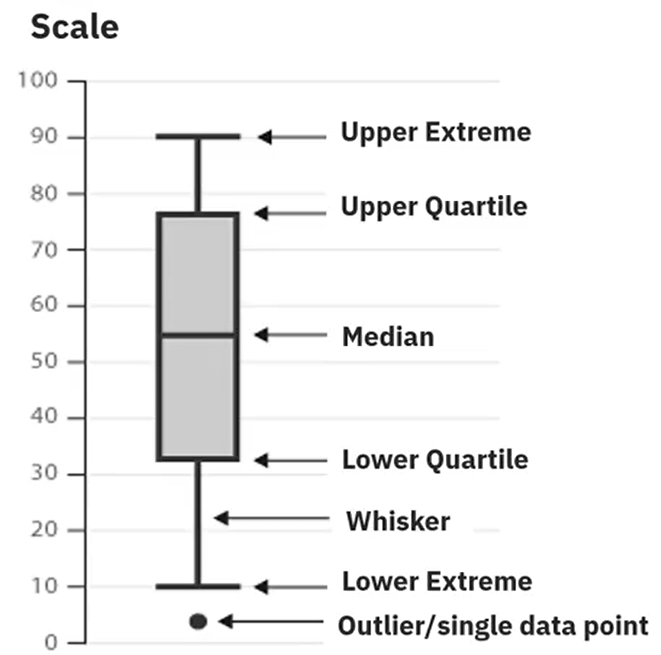
```py
sns.boxplot(x='drive-wheels', y='price', data=df)
```
- Descriptive statistics by **Scatter Plots**
    - each observation represented as a point
    - scatter plots show the relationship between two variables:
        1. Predictor/independent variables on x-axis
        2. Target/dependent variables on y-axis
```py
y = df['price']
x = df['engine-size']
plt.scatter(x,y)

plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
```
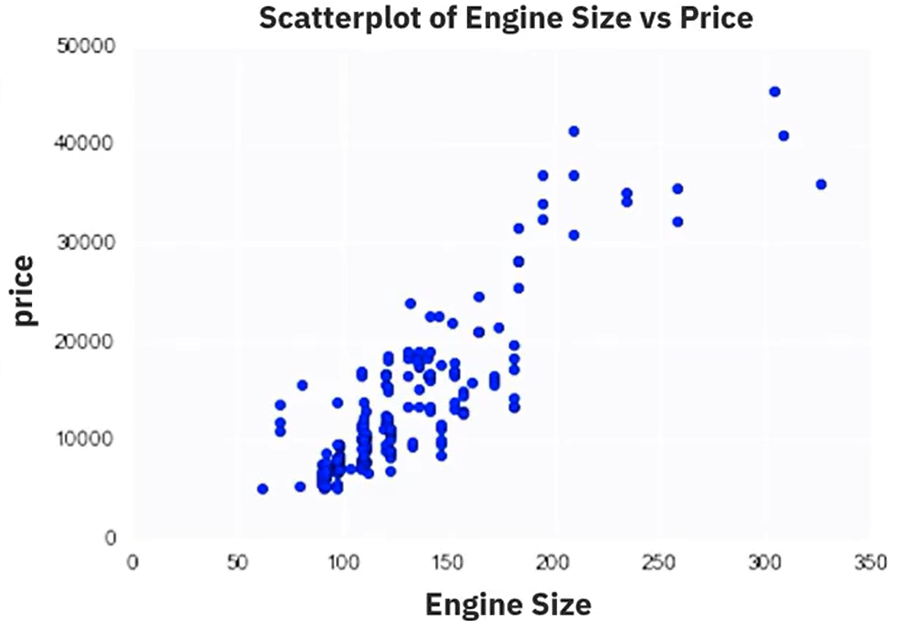
### GroupBy in Python
Question:
`Is there any relationship between the different types of 'drive system' and the 'price' of the vehicles?`

- Use Pandas **dataframe.groupby()** method:
    - Can be applied to categorical variables
    - Group data into categories
    - Single or multiple variables
```py
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
```
- Pandas method: **Pivot()**
    - One variable is displyed along the columns, and the other variable is displyed along the rows

```py
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
```
- Heatmap
    - Plot target variable against multiple variables
```py
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show()
```
### Creating Different Types of Plots in Python
[🔗 Open Creating Different Typews of Plots in Python](creating_diff_types_of_plots_inPython.pdf)

### Correlation
What is Correlation?
- Measures to what extent different variables are interdependent
- For example:
    - Lung cancer --> Smoking
    - Rain --> Umbrella
- Correlation doeasn't imply causation

Correlation: Positive linear relationship
- Correlation between two features (engine-size and price)
```py
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)
```
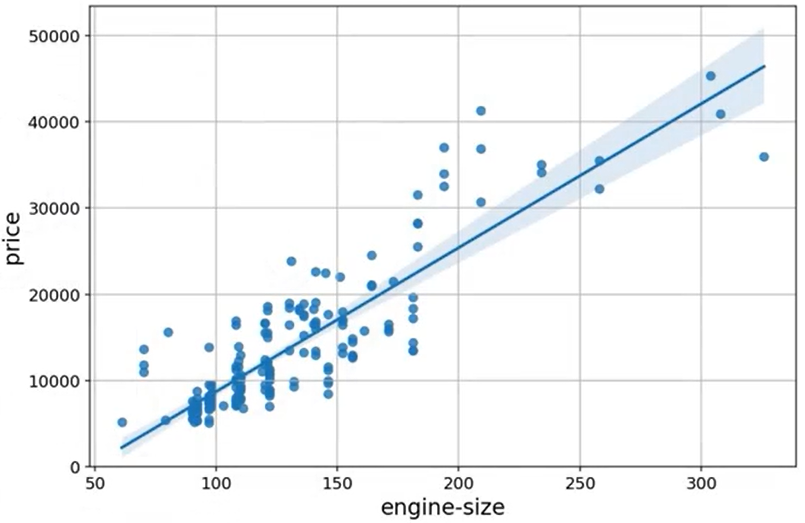
Correlation: Negative linea relationship
- Correlation between two features (high-way and price)
```py
sns.regplot(x='high-way', y='price', data=df)
plt.ylim(0,)
```
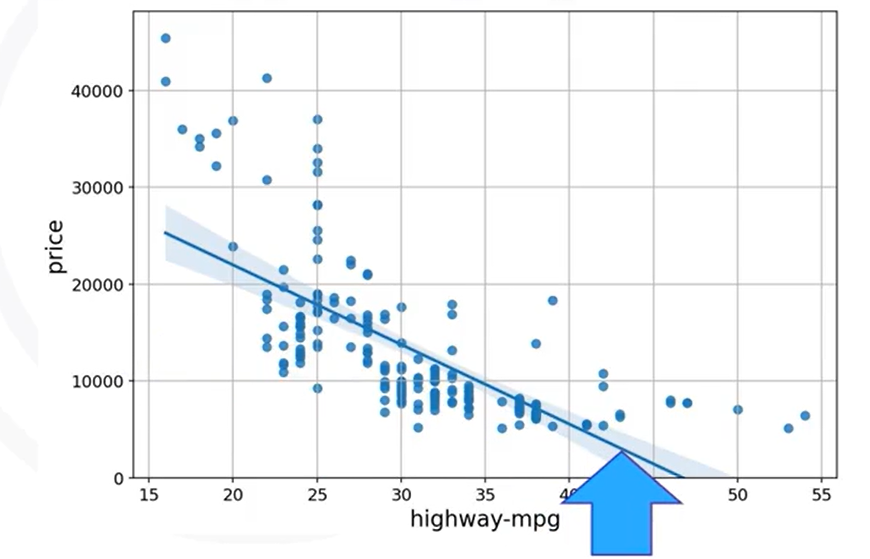

### Correlation - Statistics
Pearson Correlation
- Measure the strength of the strength of the correlation between two features
    - Correlation coefficient
    - p-value
- Correlation coefficient
    - Close to +1: Large Positive relationship
    - Close to -1: Large Negative relationship
    - Close to 0: No relationship
- p-value
    - p-value < 0.001 strong certainty in the result
    - p-value < 0.05 moderate certainty in the result
    - p-value < 0.1 week certainty in the result
    - p-value > 0.1 no certainty in the result
```py
pearson_coef, p-value = stats.pearsonr(df['horsepower'], df['price'])
```
Correlation - Heatmap
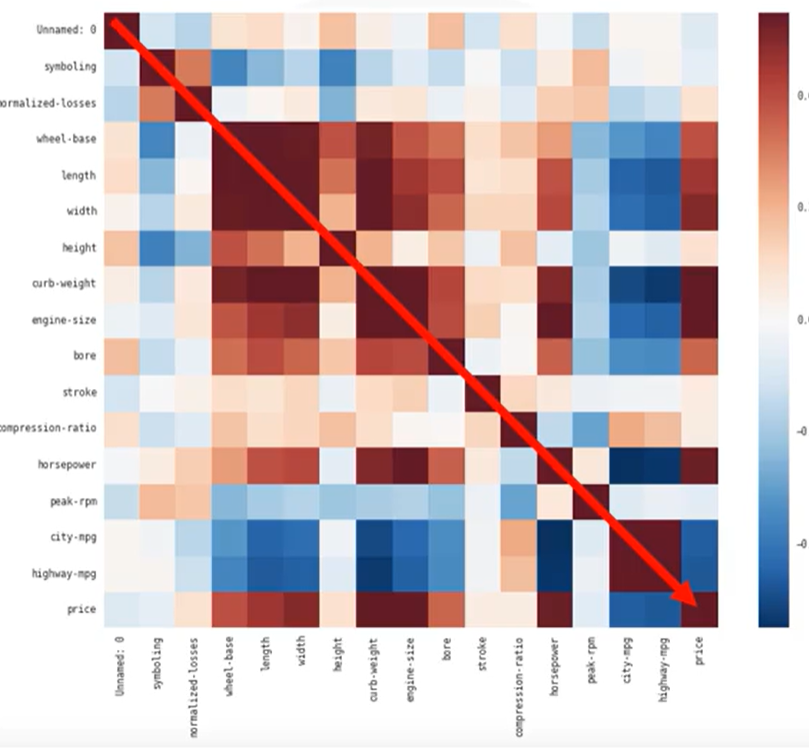

### Chi-Squared Test for Categorical Variables
[🔗 Open Chi-square Test for Categorical Variables](chisquare_test_for_categorical_variables.pdf)

### Hands-on Lab: Exploratory Data Analysis
[🔗 Open Hands-on Lab: Exploratory Data Analysis - Used Cars Pricing](Exploratory_data_analysis_cars.ipynb)

[🔗 Open Hands-on Lab: Exploratory Data Analysis - Laptop Pricing](Exploratory_data_analysis_laptop.ipynb)
### Module 3 Cheat Sheet: Exploratory Data Analysis
[🔗 Open Module 3 Cheat Sheet](module3_cheatsheet.pdf)

## Chapter 4: Model Development
1. Simple and Multiple Linear Regression
2. Model Evaluation using Visualisation
3. Polynomial Regression and Pipelines
4. R-squared and MSE for In-Sample Evaluation
5. Prediction and Decision Making

Question: `How can you determine a fair value for a used car?`

- A model can be thought of as a mathematical equation used to predict a value given one or more other values
- Relating one or more independent variables to dependent variables
- Usually the more **relevant data** you have the more accurate your model is
- to understand why more data is important, consider the following situation:
    1. You have two almost identical cars
    2. Pink cars sell for significantly less
- In addition to getting more data, you can try different types of models:
    1. Simple Linear Regression
    2. Multiple Linear Regression
    3. Polynomial Regression

### Linear Regression and Multiple Linear Regression
- Linear regression will refer to one independent variable to make a prediction
- Multiple Linear Regression will refer to multiple independent variables to make a prediction 
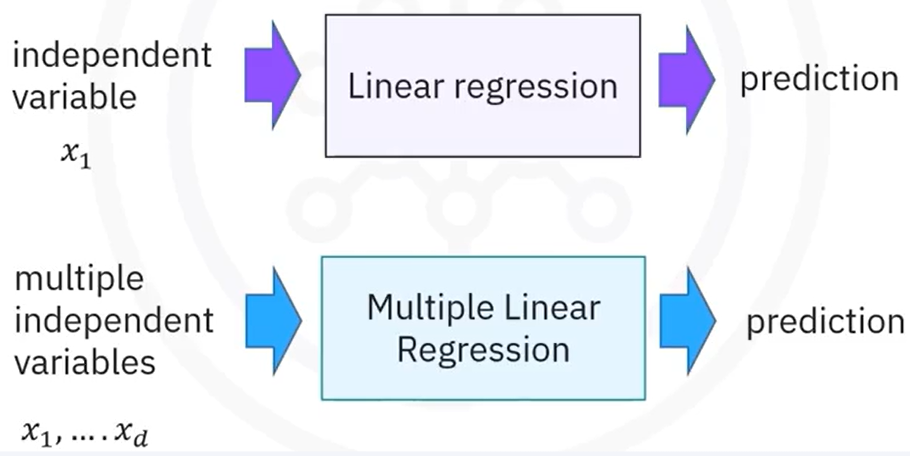
#### Simple Linear Regression
1. The predictor (independent) variable - $x$
2. The target (dependent) variable - $y$
$$ y = b_0 + b_1x$$
- $b_0$: the intercept
- $b_1$: the slope

Fit a simple linear model estimator
1. Import linear_model from scikit-learn
```py
from sklearn.linear_model import LinearRegression
```

2. Create a Linear Regression Object using the constructor
```py
lm=LinearRegression()
```
- We define the predictor variable and target variable
```py
X = df[['hgih-way']]
Y = df['price']
```

- Then use `lm.fit(X,Y)` to fit the model, i.e. find the params $b_0$ and $b_1$
- We can obtain a prediction
```py
Yhat=lm.predict(X)
```
- We can view the intercept ($b_0$): `lm.intercept_` = 38423.31
- We can also view the slope ($b_1$): `lm.coef_` = 821.73
- The realtionship between Price and Highway MPG is given by:
$$ Price = 38423.31 - 821.73*highway-mpg$$

#### Multiple Linear Regression
This method is used to explain the relationship between:
- One continuous target ($y$) variable
- Two or more predictor ($x$) variables

Example: $\hat{y} = b_0 +b_1x_1+b_2x_2+b_3x_3+b_4x_4$
- $b_0$: intercept ($x=0$)
- $b_1$ the coefficient of parameter of $x_1$
- $b_2$ the coefficient of parameter $x_2$ and so on...

Fitting a multiple linear model estimator 
1. We can extract the for 4 predictor variables and store them in the variable Z
```py
Z = df[['horsepower', 'curb-eight', 'engine-size', 'highway-mpg']]
```
2. Then train the model as before:
```py
lm.fit(Z, df['price'])
```
3. We can also obtain a prediction
```py
Yhat = lm.predict(X)
```
### Model Evaluation Using Visualisation
#### Regression plot
Why use regression plot?

It gives us a good estimate of:
- The relationship between two variables
- The strength of the correlation
- The direction of the relationship (positive or negative)

Regression plot shows us a combination of:
- The scatterplot: where each point represents a different $y$
- The fitted linear regression line ($\hat{y}$)
```py
import seaborn as sns
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
```
#### Residual plot
- Look at the spread of the residuals:
    - Randomely spead out around x-axis then a linear model is appropriate
    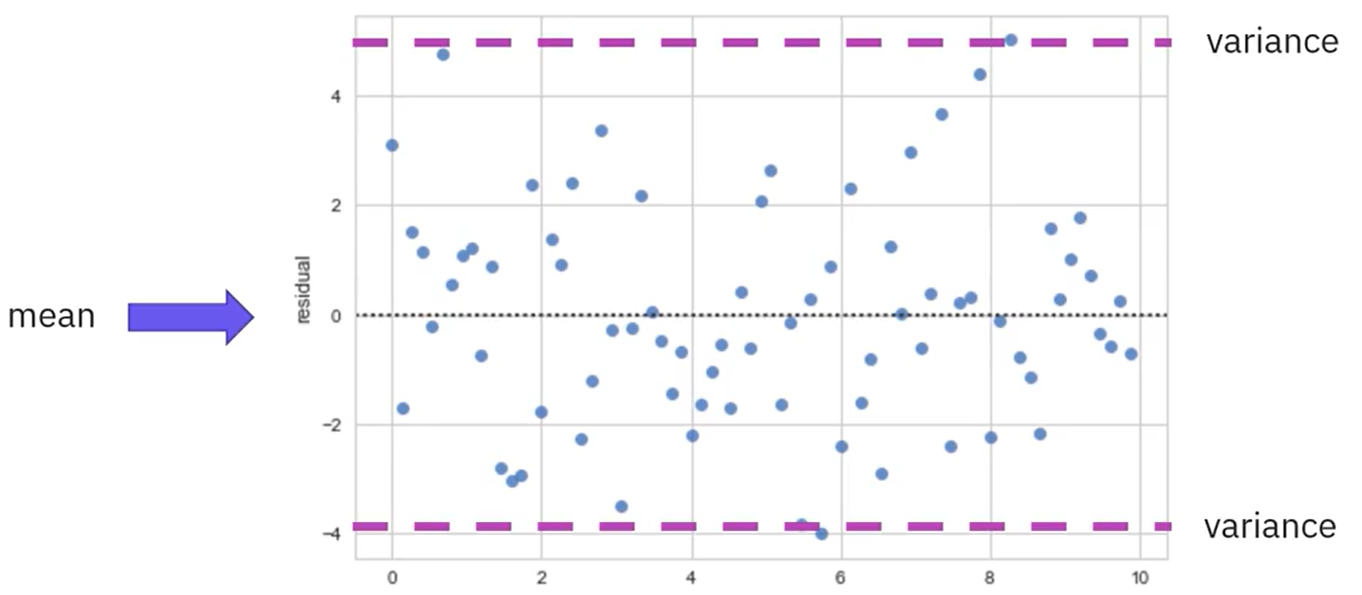

    - Not randomly spread out around the x-axis, nonlinear model may be more appropriate
    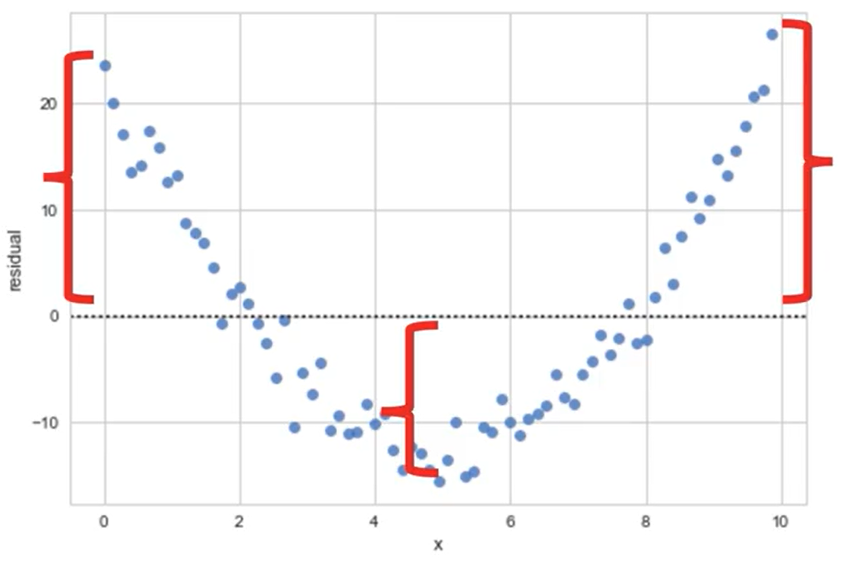

    - Not randomly spread out around the x-axis, variance appears to change with x-axis, the linear model is incorrect
    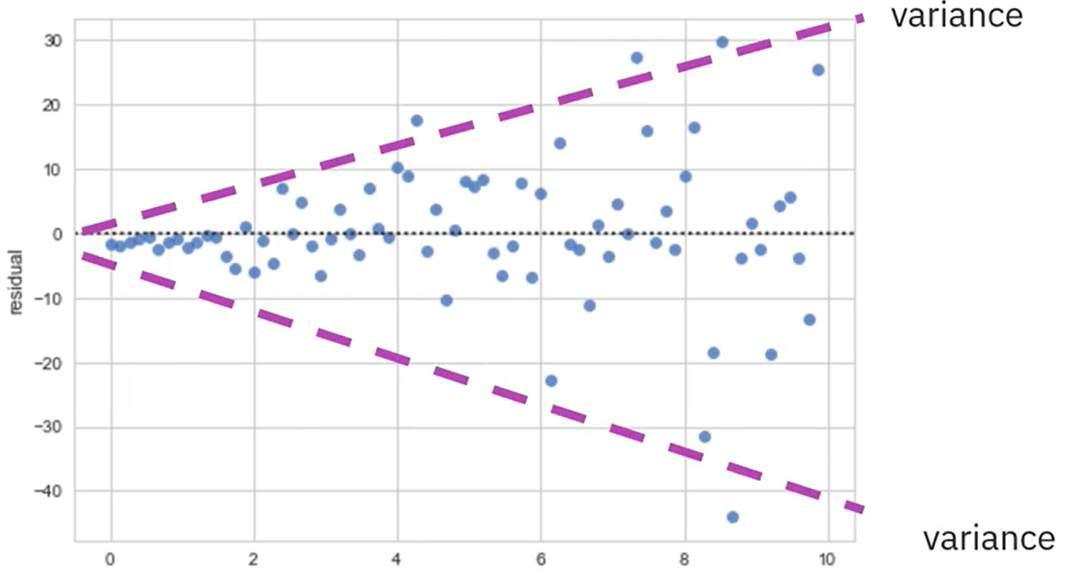
```py
import seaborn as sns
sns.residplot(df['highway-mpg'], df['price'])
```
#### Distribution plots
Compare the distribution plots:
- The fitted values that result from the model
- The actual values
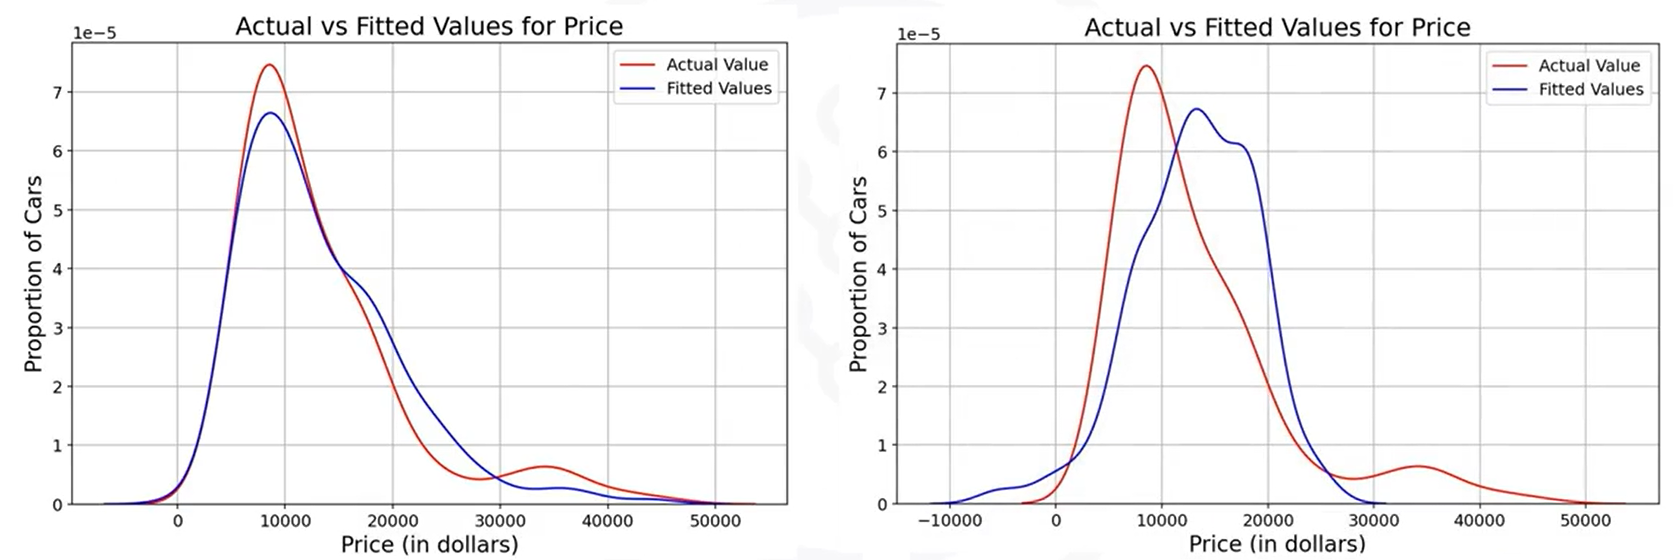
```py
import seaborn as sns
ax1 = sns.displot(df['price'], hist=False, color='r', label='Actual value')
sns.displot(Yhat, hist=False, color='b', label='Fitted Value', ax=ax1)
```
### Polynomial Regression and Pipelines
- A special case of the general linear regression model
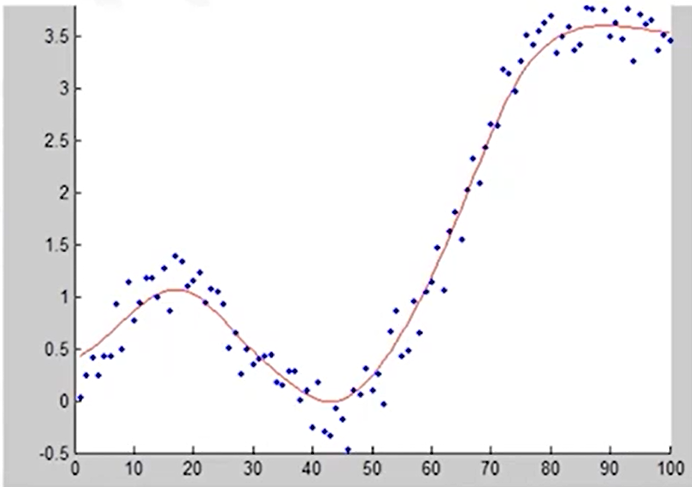

**Curvilinear relationships:**
By squaring or setting higher-order terms of the predictor variables
- Quadratic - $2^{nd}$ order: $ \hat{Y} = b_0 + b_1x_1 + b_2(x_1)^2 $

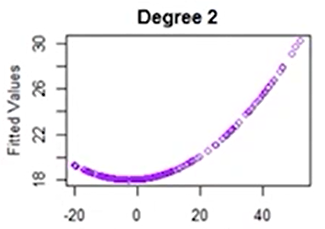
- Cubic - $3^{rd}$ order: $ \hat{Y} = b_0 + b_1x_1 + b_2(x_1)^2 + b_3(x_1)^3 $

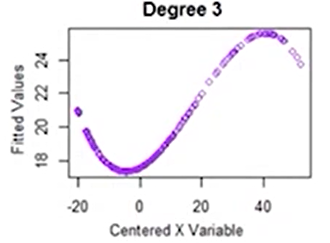
- Higher order: $ \hat{Y} = b_0 + b_1x_1 + b_2(x_1)^2 + b_3(x_1)^3 + ...$ 

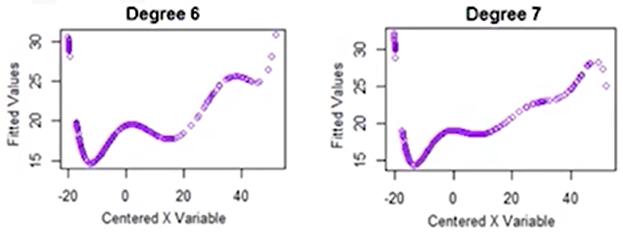

1. Calculate Polynomial of $3^{rd}$ order:
```py
f=np.polyfit(x, y, 3)
p=np.plyld(f)
```
2. We can print out the model
```py
print(p)
```
#### Polynomial Regression with more than one dimension
- We can also have multi dimensional poly linear regression
$$ \hat{Y} = b_0 + b_1x_1 + b_2x_2 + b_3x_1x_2 + b_4(x_1)^2 + b_5(x_2)^2 + ... $$
- Numpy can process this regression, we use the "preprocessing" library in scikit-learn:
```py
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2, include_bias=False)
x_plly=pr.fit_transform(x[['horsepower', 'curb-weight']])
```
- For example we can Normalise the each feature simultaneuosly:
```py
from sklearn.preprocessing import StandardScaler
SCALE=StandardScaler()
SCALE.fit(x_data[['horsepower', 'highway-mpg']])
x_scale = SCALE.transform(x_data[['horsepower', 'highway-mpg']])
```
#### Pipelines
- There are many steps to getting a prediction
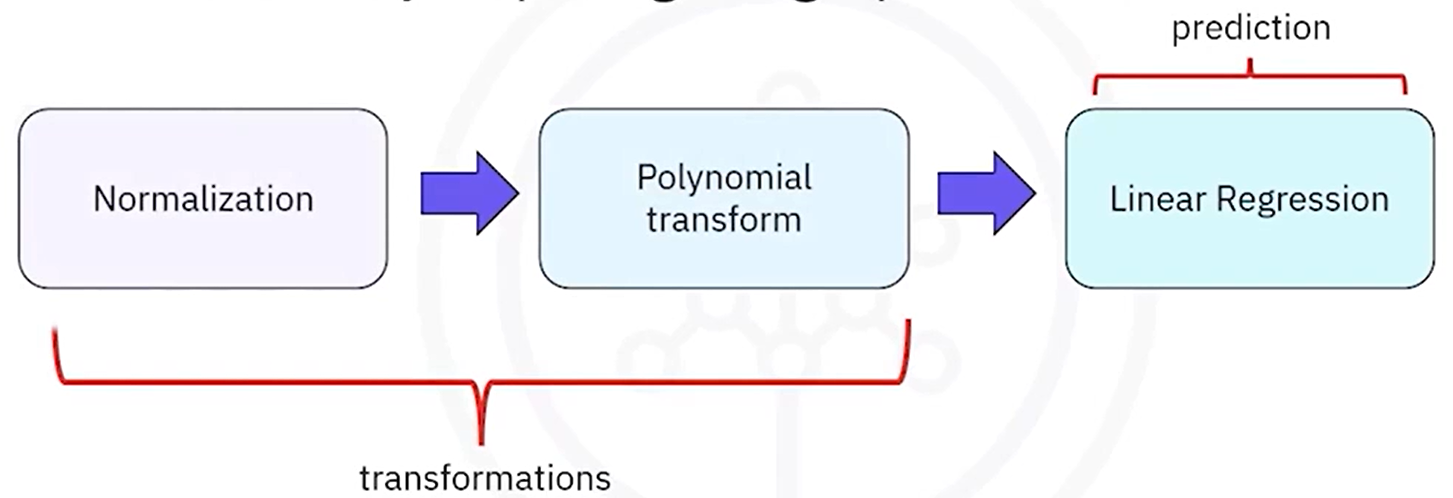
```py 
from skilearn.preprocessing import PolynomialFeatures
from skilearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipline

Input =[('polynomial', PolynomialFeature(degree=2)), ('scale', StadardScaler()), ('Model', LinearRegression())]
# Pipeline constructor
pipe = Pipeline(Input)
# We can train the pipeline object
Pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)
yhat = Pipe.predit(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
```
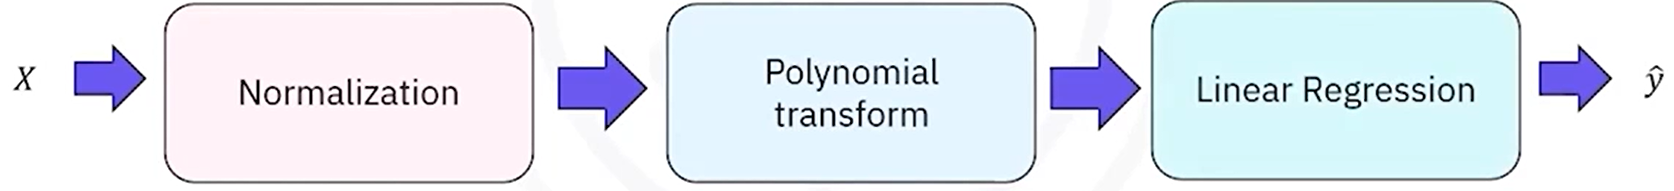

### Kernel Density Estimation (KDE) Plots for Model Evaluation
[🔗 Open Kernal Density Estimation (KDE) Plot for Model Evaluation](kernal_density_estimation_KDE.pdf)

### Measures for In-Sample Evaluation
- A way to numerically determine how good the model fits on dataset.

- Two important measures to determine the fit of a model:
    - Mean Squared Error (MSE)
    ```py
    from sklearn.metrics import mean_squared_error
    mean_squared_error(df['price'], Y_predict_simple_fit)
    ```
    - R-squared ($R^2$)
        - The coefficient of Determination or R squared ($R^2$)
        - Is a measure to determine how close the data is to the fitted regression line
        - $R^2$: the percentage of variation of the target variable (Y) that is explained by the linear model
        - Think about as comparing a regression model to a simple model i.e the mean of the data points
        - Coefficient of Determination ($R^2$)
        $$ R^2 = \left(1 - \frac{MSE of regression line}{MSE of the average of the data} \right) $$
        - Generally the values of the MSE are between 0 and 1
        - We can calculate the $R^2$ as follows
        ```py
        x= df[['highway-mpg']]
        y=['price']
        
        lm.fit(x, y)
        
        lm.score(x, y)
        0.496591188
        ```
### Prediction and Decision Making
To determine final best fit, we look at a combination of:
- Do the predicted values make sense
- Visualisation
- Numerical measures for evaluation
- Comparing models

Do the predicted values make sense?
- First wwe train the model
```py
lm.fit(df['highway-mpg'], df['price'])
```
- Let's predict the price of car with 30 highway-mpg
```py
lm.predit(np.array(30.0).reshape(-1,1))
```
- We use the numpy function arrange to generate a sequence from 1 to 100
```py
new_input = np.arange(1, 101, 1).reshape(-1, 1)
```
- We can predict new values
```py
yhat = lm.predict(new_input)
```

Visualisation
- Simple visualising your data with a regression

Comparing MLR and SLR:
1. Is a lower MSE always implying a better fit?
    - Not necessarily
2. MSE for an MLR model will be smaller than the MSE for an SLR model since the errors of the data will decrease when more variables are included in the model
3. Polynomial regression will also have a smaller MSE than regular regression
4. A similar inverse relationship hold for $R^2$

### Lab: Model Development - Used Car Pricing
[🔗 Open Lab: Model Development - Used Car Pricing](lab_model_development_cars.ipynb)

### Lab: Model Development - Laptop Pricing
[🔗 Open Lab: Model Development - Laptop Pricing](lab_model_development_laptop.ipynb)

### Module 4 Cheat Sheet: Model Development
[🔗 Open Module 4 Cheat Sheet: Model Development](module4_cheatsheet.pdf)

## Chapter 5: Model Evaluation and Refinement
### Model Evaluation
- In-sample evaluation tells us how well our model will fit the data used to train it?
- Problem?
    - It does not tell us how well the trained model can be used to predict new data
- Solution?
    - In-sample data or training data
    - Out-of-sample evaluation or test set
- Split dataset into:
    - training set (70%)
    - testing set (30%)
- Build and train the model with a training set
- Use testing set to assess the performance of a predictive model
- When we have completed testing our model we should use all the data to train the model to get the best performance

Function `training_test_split()`
- Split data into random train and test subsets
```py
from sklearn.model_selection import train_test_split
x_train, x_tét, y_train, y_test = train_test_split(x_data,  y_data, test_size=0.3, randome_state=0)
```
- **x_data**: features or independent variables
- **y_data**: dataset target: df['price']
- **x_train, y_train**: parts of available data as training set
- **x_test, y_test**: parts of available data as testing set
- **test_size**: percentage of the data for testing (here 30%)
- **random_state**: number generator use for random sampling

Generalisation performance
- Generalisation error is a measure of how well our data does at predicting previously unseen data
- This error we obtain using out tesing data is an approximation of this error
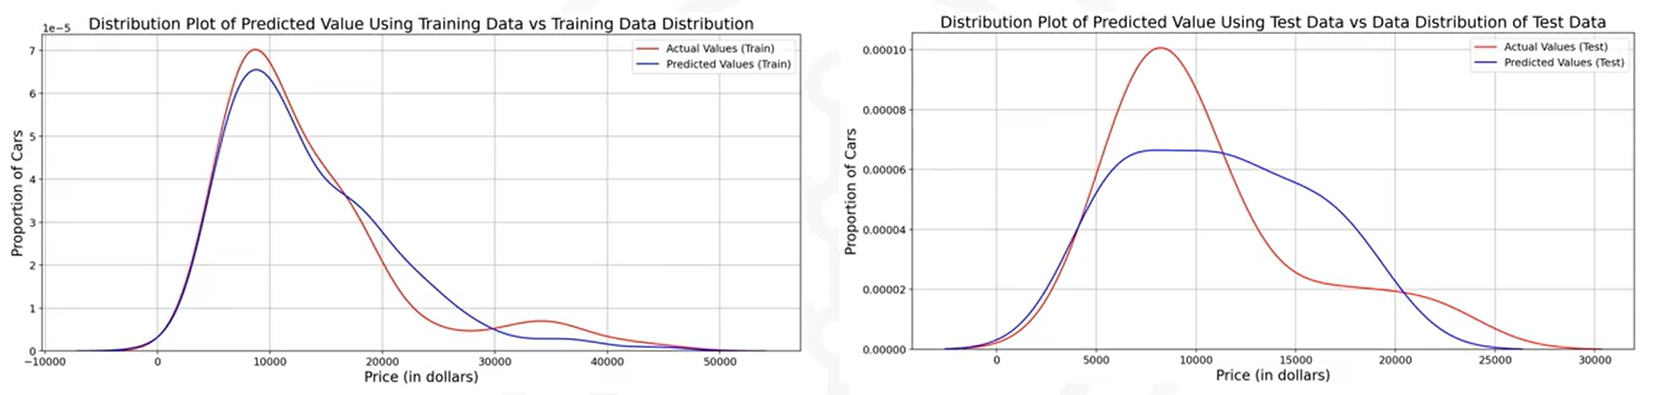

Cross validation
- Most common out-of-sample evaluation metrics
- More effective use of data (each observation is used for both training and testing)
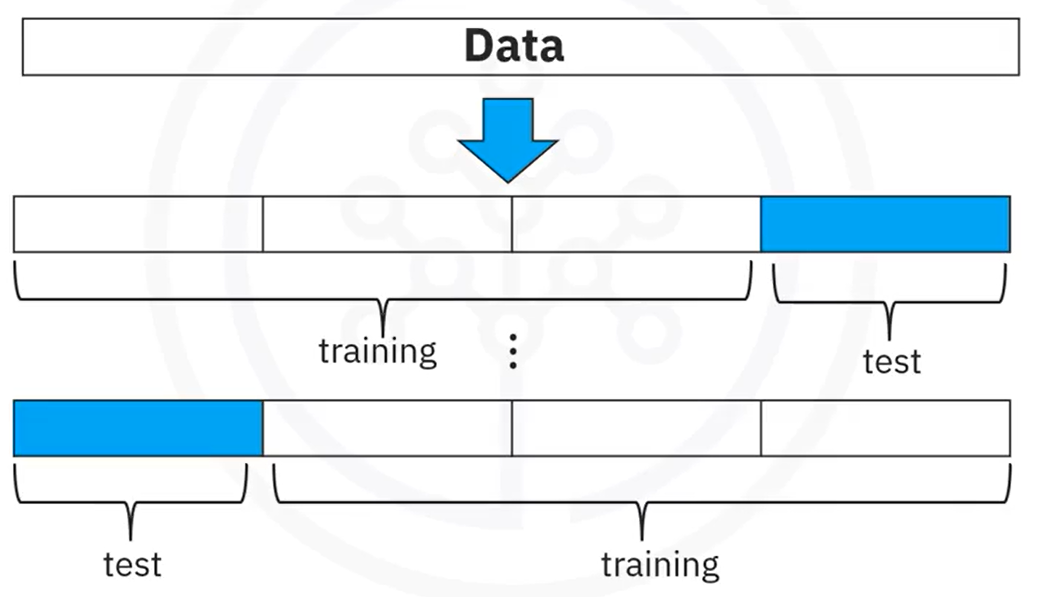

Function `cross_val_score()`
```py
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lr, x_data, y_data, cv=3)
# cv=3 means split the data into three-equal sets
np.mean(scores)
```
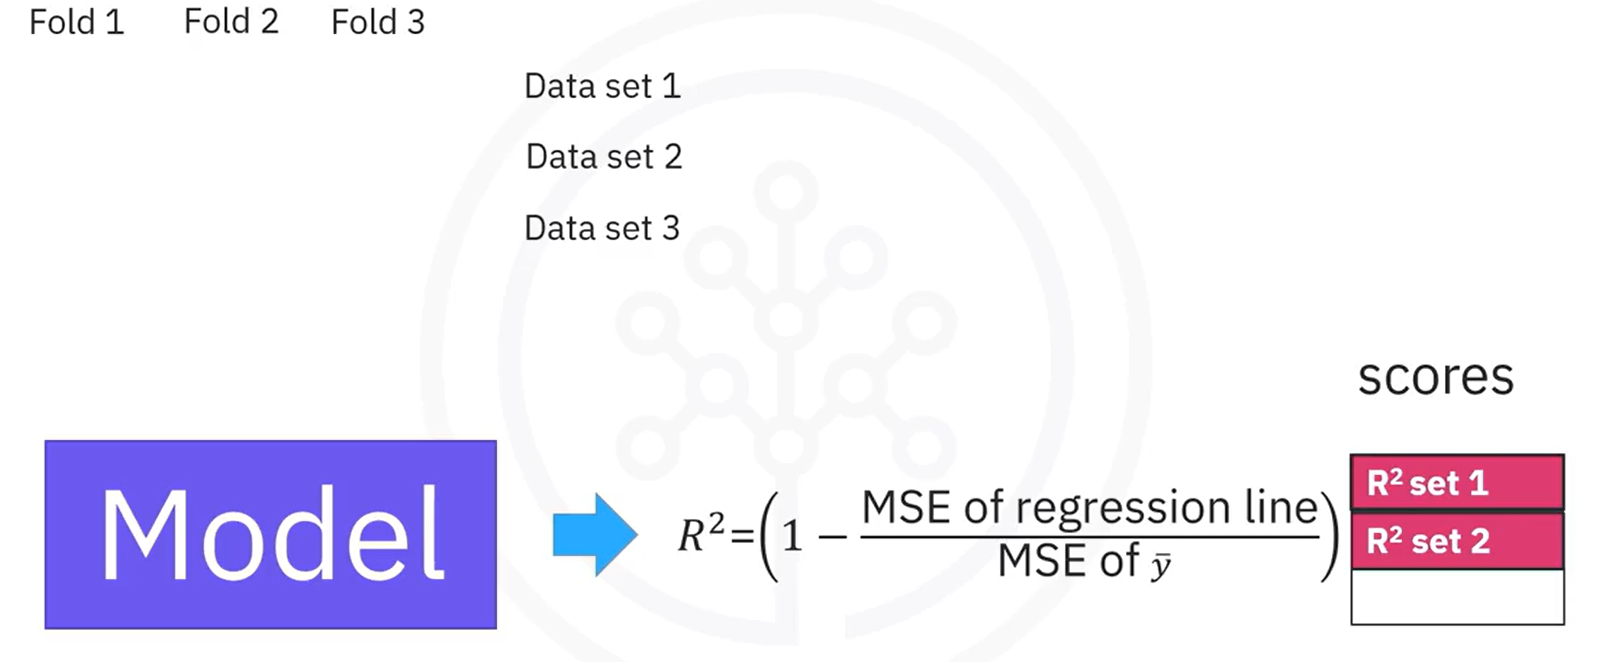
$$ MSE = \frac{1}{n}\sum(Y_{i} - \hat{Y_{i}})^2 $$
Function `cross_val_predict()`
- It returns the prediction that was obtained for each element when it was in the test set.
- Has a similar interface to `cross_val_score()`
```py
from sklearn.model_selection import cross_val_predict
# the input is exactly the same as the cross_val_score() function
yaht=cross_val_predict(lr2e, x_data, y_data, cv=3)
```
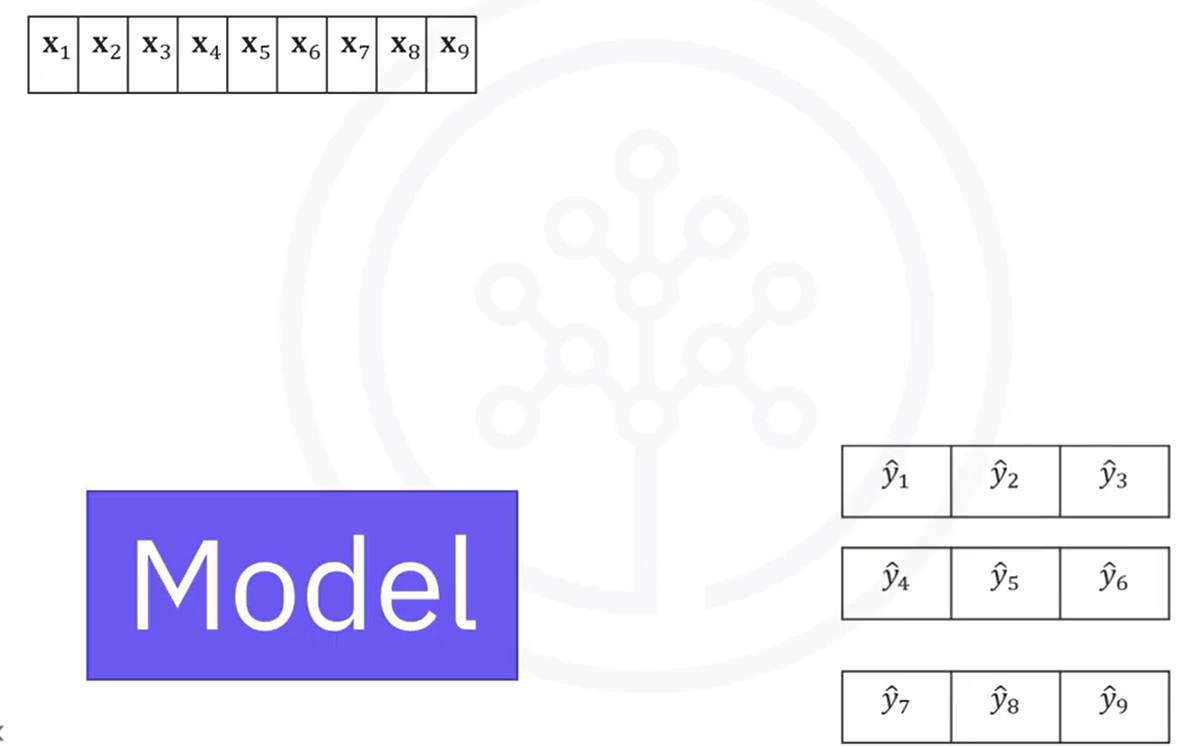

### Overfitting, Underfitting and Model Selection
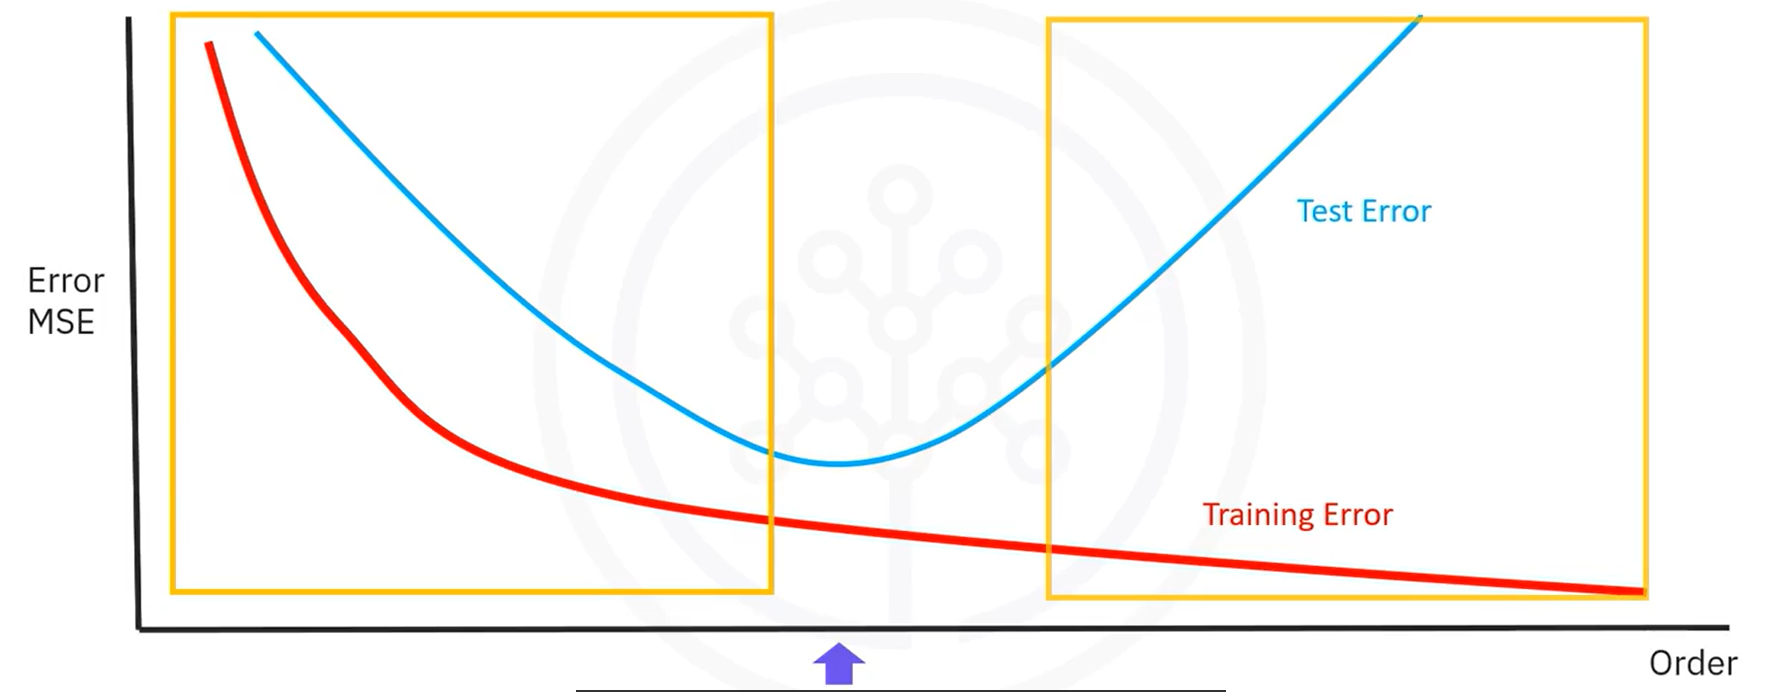
```py
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    # We transform the training and test data into polynomial using the fit transform method
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_tranform(x_test[['horsepower']])
    # We fit the regression model using the transformed data
    lr.fit(x_train_pr, y_train)
    # We then calculate the R square
    Rsqu_test.append(lr.score(x_test_pr, y_test))
```
### Introduction to Ridge Regression
[🔗 Open Introduction to Ridge Regression](ridge_regression.pdf)

Ridge Regression
- Ridge regresison controls the magnitude of these polynomial coefficients by introducting the parameter Alpha.
```py
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x, y)
Yhat = RidgeModel.predict(x)
```
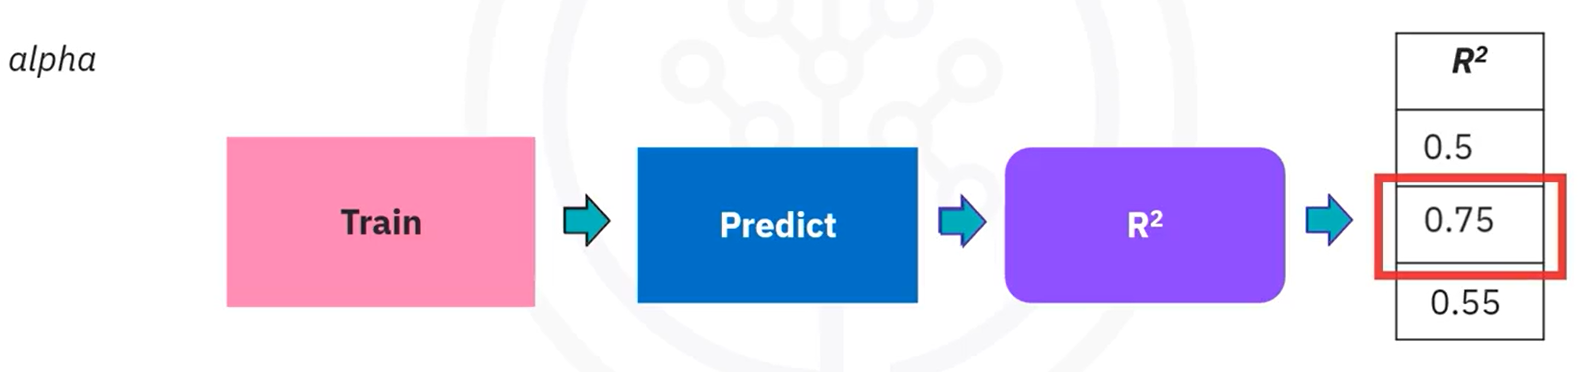
> we choose the value of alpha at which the R square is maximised, we increase the Alpha, simultaneuosly decrease the R square.

### Grid Search
Hyperparameters
- Alphas in Ridge regression is called a hyperparameters
- Scikit learn has a means of automatically iterating over these hyperparameters using cross-validation called Grid Search
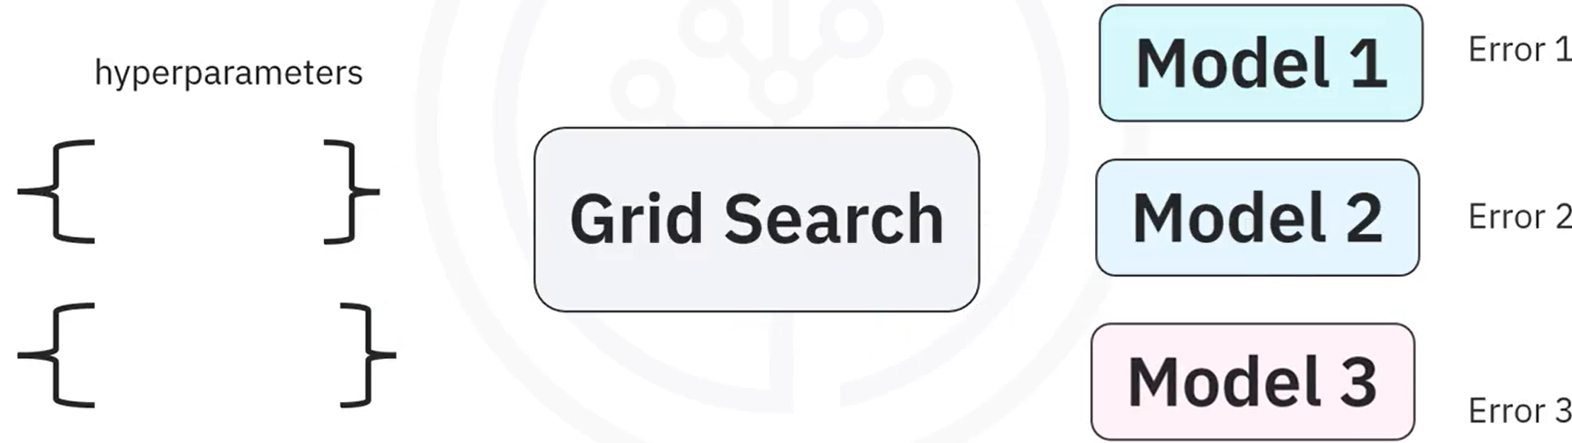
```py
from sklean.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha': [0.001, 0.01, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4) # create GridSearchCV object

Grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']
```
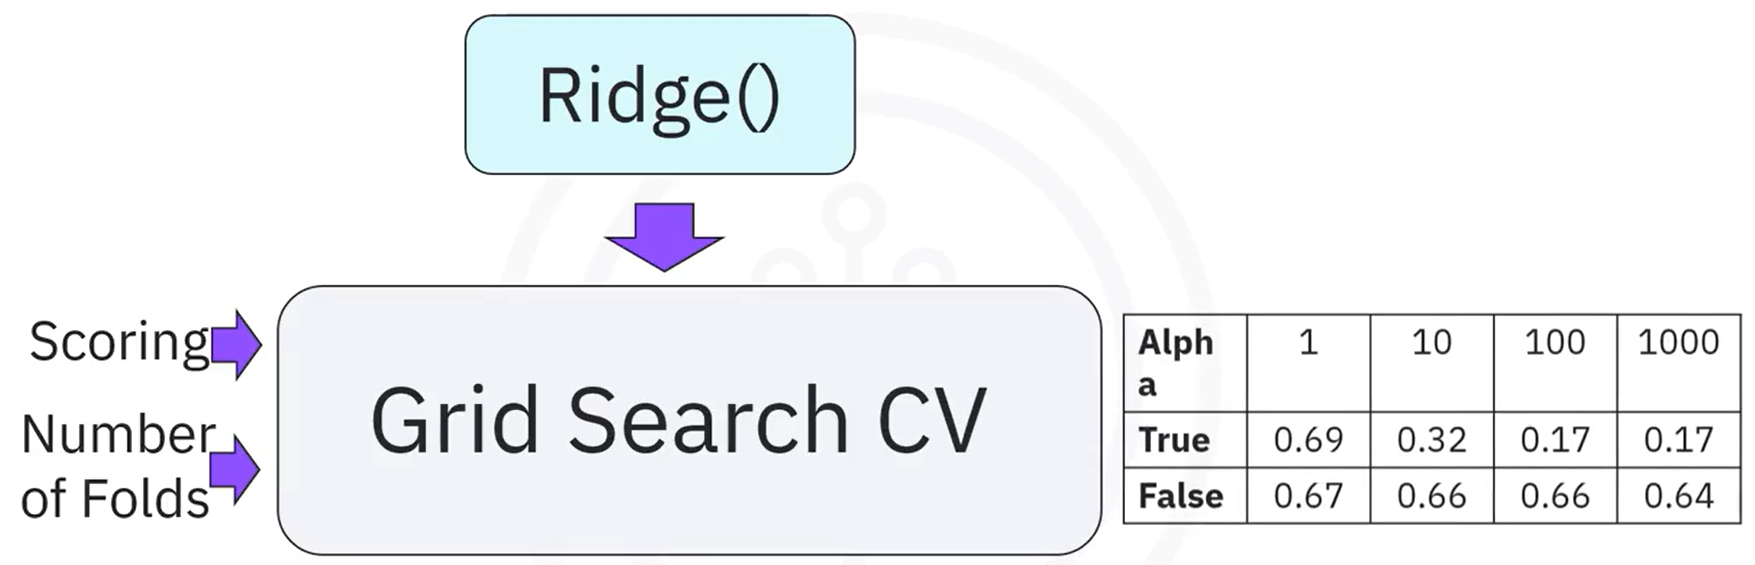
```py
# we can print out the score for the different free parameter values
for param, mean_val, mean_test in zip(scores['params'], scores['mean_test_score'], scores['mean_train_score'])

print(param, 'R squared on test data:', mean_val, 'R squared on train data:', mean_test)
```
### Lab: Model Evaluation and Refinement - Used Cars Pricing
[🔗 Open Lab: Model Evaluation and Refinement - Used Cars Pricing](Model_Evaluation_and_Refinement_cars.ipynb)

### Lab: Model Evaluation and Refinement - Laptop Pricing
[🔗 Open Lab: Model Evaluation and Refinement - Laptop Pricing](practice_model_evaluation_laptop.ipynb)

### Module 5 Cheat Sheet: Model Evaluation and Refinement
[🔗 Open Module 5 Cheat Sheet: Model Evaluation and Refinement](module5_cheatsheet.pdf)

## Final Assignment
### Practice Project
[🔗 Open Project Overview](projectoverview.pdf)

[🔗 Open Practice Project](practice_project-20230929-1695945600.ipynb)
### Final Project
[🔗 Final Project Scenario for Reading](House_Sales_in_King_Count_USA.ipynb)

[🔗 Lab for Final Project - Data Analytics for House Pricing Data Set](House_Sales_in_King_Count_USA-20231003-1696291200.finalproject.ipynb)
### Python Cheat Sheet for Data Analytics
[🔗 Open Cheat Sheet](Python%20Cheat%20Sheet%20for%20Data%20Analysis.pdf)
### Final Exam